### User input

In [1]:
decimal = '.'                                                                # decimal of the input file
sep = ';'                                                                    # separator of the input file
input_dir = 'C:/Users/cace0002/AbspectroscoPY/results/df_baselinecor_sw.csv' # input directory
output = 'C:/Users/cace0002/AbspectroscoPY/results/'                         # output directory
dateheadername = 'Timestamp'                                                 # header of the date  
header = 0                                                                   # header row number
sample_name = 'sw'                                                           # name of the sample

# Specify the window sizes of the median filters and the sampling frequency:
median_window1_min = 14
median_window2_min = 30
median_window3_min = 60
median_window_min_selected = median_window3_min

sample_frequency_min = 2

# To plot the time series of absorbance data using different median filters, the user can modify:
col_sel = '255 nm'                                                           # select a specific wavelength to plot
timestart = '2018-11-13 04:32:00'                                            # starting time and ending time
timeend =   '2018-12-04 09:12:00'                                
fig_format = '.tiff'                                                         # format of the exported figure
dpi = 300                                                                    # resolution of the exported figure

### Start environment and import data

In [2]:
import abspectroscopy_functions as abspy # Functions from the AbspectroscoPY toolbox
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

df = pd.read_csv(input_dir, sep = sep, header = header, index_col = 0) 
df.index = pd.to_datetime(df.index)      # make sure time column (here index) is using time format
df

,220 nm,222.5 nm,225 nm,227.5 nm,230 nm,232.5 nm,235 nm,237.5 nm,240 nm,242.5 nm,...,675 nm,677.5 nm,680 nm,682.5 nm,685 nm,687.5 nm,690 nm,692.5 nm,695 nm,697.5 nm
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-13 04:32:00,22.76695,20.64215,18.54175,16.84815,15.83145,14.89785,13.82195,12.85035,12.16225,11.71205,...,0.04475,0.06025,-0.00385,0.02815,0.09015,0.06885,-0.01155,-0.04745,0.03685,0.07935
2018-11-13 04:34:00,22.80440,20.67310,18.55970,16.85460,15.83970,14.91100,13.83830,12.86480,12.17320,11.72100,...,0.05380,0.09650,0.01640,0.02060,0.07390,0.05260,-0.01480,-0.04270,0.02460,0.04770
2018-11-13 04:36:00,22.79690,20.66950,18.57090,16.86700,15.84600,14.91140,13.83800,12.87240,12.18490,11.73170,...,0.04250,0.07030,0.00690,0.03620,0.10000,0.07940,-0.00780,-0.04260,0.03610,0.06190
2018-11-13 04:38:00,22.79075,20.64575,18.54705,16.85765,15.84495,14.91115,13.82845,12.85725,12.17455,11.72325,...,0.04365,0.03985,-0.03385,-0.00515,0.06285,0.05975,-0.02355,-0.08855,-0.00155,0.05805
2018-11-13 04:40:00,22.78895,20.65205,18.56085,16.85755,15.83875,14.90045,13.82485,12.86015,12.17635,11.72295,...,0.05605,0.06165,-0.02685,0.00705,0.09195,0.06575,-0.02415,-0.06045,0.00405,0.04075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-04 09:04:00,20.81855,18.86255,16.96855,15.43195,14.50185,13.65435,12.67375,11.79045,11.16905,10.75085,...,0.06315,0.08485,0.01115,0.02905,0.06955,0.05175,0.00955,-0.02685,0.02355,0.04975
2018-12-04 09:06:00,20.82600,18.86130,16.95410,15.41770,14.48830,13.64910,12.67190,11.78560,11.16020,10.73860,...,0.03690,0.06670,-0.00770,0.00950,0.05920,0.04270,-0.00140,-0.03960,0.00610,0.03950
2018-12-04 09:08:00,20.80975,18.85405,16.96505,15.43245,14.50205,13.65615,12.67395,11.79105,11.17265,10.75475,...,0.03185,0.06695,-0.00985,0.00115,0.06105,0.05885,0.02425,-0.03655,-0.00785,0.02955


### Test different window sizes of the median filter: rolling

In [3]:
df_bc = df.copy()
median_window1 = median_window1_min / sample_frequency_min # median window from minute to number of samples
median_window2 = median_window2_min / sample_frequency_min
median_window3 = median_window3_min / sample_frequency_min
median_window_selected = median_window_min_selected / sample_frequency_min
print('number of samples for window 1:', median_window1)
print('number of samples for window 2:', median_window2)
print('number of samples for window 3:', median_window3)
print('number of samples for window selected:', median_window_selected)

df_median1 = df_bc.copy()
median_window1_int=int(median_window1)
df_median1 = df_median1.rolling(median_window1_int, center=True, axis=0).median()# compute the rolling median of the absorbance series
df_median1 = df_median1.dropna(axis=0)                                           # drop rows with NaN due to rolling median calculation

df_median2 = df_bc.copy()
median_window2_int=int(median_window2)
df_median2 = df_median2.rolling(median_window2_int, center=True, axis=0).median()
df_median2 = df_median2.dropna(axis=0) 

df_median3 = df_bc.copy()
median_window3_int=int(median_window3)
df_median3 = df_median3.rolling(median_window3_int, center=True, axis=0).median()
df_median3 = df_median3.dropna(axis=0)

number of samples for window 1: 7.0
number of samples for window 2: 15.0
number of samples for window 3: 30.0
number of samples for window selected: 30.0


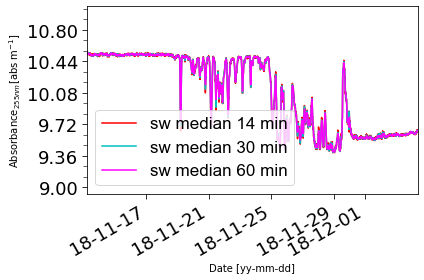

In [4]:
abspy.makerollplot(df_median1, df_median2, df_median3, output, col_sel, timestart, timeend, sample_name)

### Select a window size of the median filter

In [5]:
df_median_selected = df_bc.copy()
median_window_selected_int=int(median_window_selected)
df_median_selected = df_median_selected.rolling(median_window_selected_int, center=True, axis=0).median()
df_median_selected = df_median_selected.dropna(axis=0) 
df_median_selected.to_csv(output + 'df_mediancor_' + str(sample_name) + '_' + str(median_window_selected) + '.csv', sep = sep, decimal = decimal, index=True) # export the median filtered dataframe
df_median_selected

,220 nm,222.5 nm,225 nm,227.5 nm,230 nm,232.5 nm,235 nm,237.5 nm,240 nm,242.5 nm,...,675 nm,677.5 nm,680 nm,682.5 nm,685 nm,687.5 nm,690 nm,692.5 nm,695 nm,697.5 nm
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-13 05:02:00,22.784525,20.651950,18.554625,16.856475,15.838950,14.904900,13.827675,12.858700,12.173325,11.721500,...,0.050025,0.066675,-0.008750,0.010975,0.079125,0.057075,-0.017825,-0.058125,0.011575,0.047975
2018-11-13 05:04:00,22.784950,20.652800,18.554625,16.856975,15.839425,14.906350,13.828325,12.860050,12.173850,11.721900,...,0.051375,0.067175,-0.008750,0.010975,0.079125,0.057075,-0.017825,-0.058125,0.011575,0.047975
2018-11-13 05:06:00,22.784950,20.651950,18.552950,16.856975,15.838950,14.904900,13.827675,12.858700,12.173850,11.721900,...,0.051375,0.067175,-0.008750,0.010975,0.080825,0.059150,-0.017825,-0.058125,0.011200,0.048650
2018-11-13 05:08:00,22.784525,20.650000,18.552600,16.856450,15.838675,14.904150,13.826900,12.857350,12.173150,11.721500,...,0.051375,0.067175,-0.008750,0.010975,0.080825,0.057075,-0.017825,-0.058125,0.011200,0.048650
2018-11-13 05:10:00,22.783075,20.650900,18.552600,16.854275,15.837425,14.903750,13.826900,12.858700,12.173150,11.721500,...,0.051375,0.067725,-0.007900,0.013200,0.082325,0.057075,-0.015975,-0.056875,0.011200,0.047500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-04 08:36:00,20.798200,18.844425,16.952175,15.417375,14.488525,13.643100,12.663800,11.776500,11.155675,10.739550,...,0.050700,0.077575,-0.000750,0.019800,0.077650,0.060050,0.007575,-0.038825,0.007625,0.049875
2018-12-04 08:38:00,20.798925,18.845675,16.953275,15.418000,14.488775,13.646475,12.667200,11.779050,11.158200,10.739550,...,0.050700,0.077500,-0.002175,0.019000,0.076525,0.058550,0.007250,-0.039275,0.007350,0.049875
2018-12-04 08:40:00,20.799325,18.846300,16.953750,15.418675,14.489525,13.647975,12.667625,11.782475,11.160775,10.740700,...,0.050700,0.077500,-0.003375,0.019000,0.074500,0.058275,0.007575,-0.039275,0.007050,0.048925
